## Feature Engineering

In [617]:
import pandas as pd

In [618]:
data = pd.read_csv("../scripts/data-preprocessed.csv")

In [619]:
import missingno as msno

<Axes: >

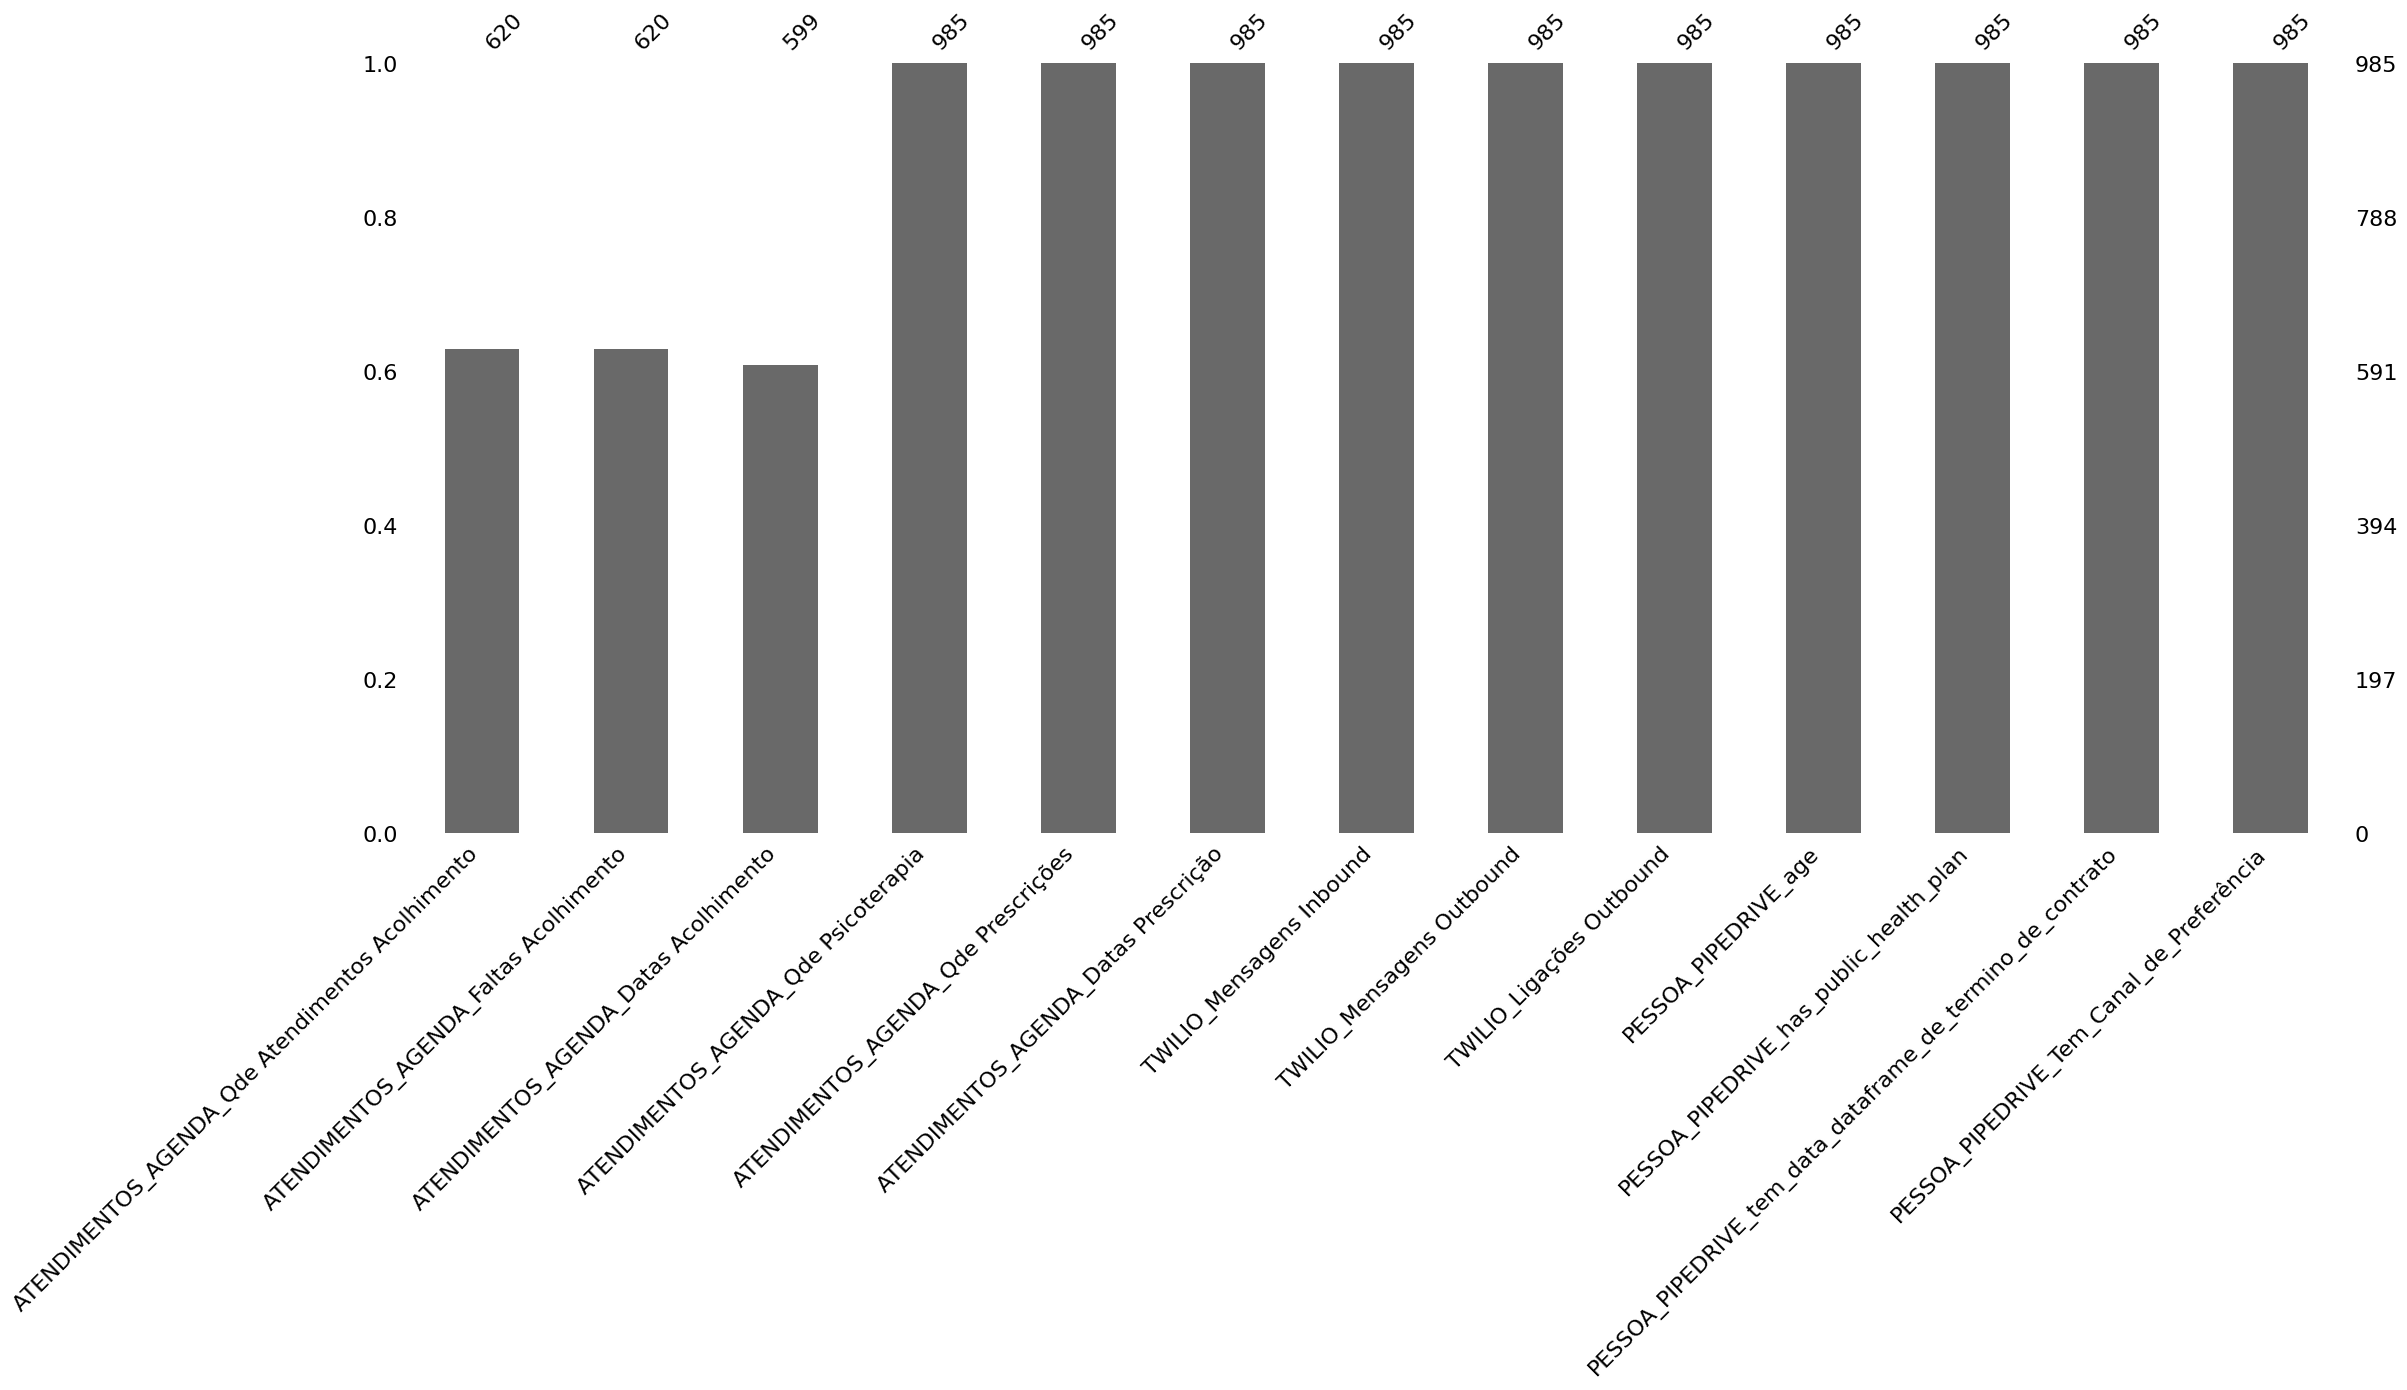

In [620]:
msno.bar(data.iloc[:,26:39])

## ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento

Descrição : Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health

Observação : Junto a coluna "ATENDIMENTOS_AGENDA_Datas Acolhimento", podemos criar uma nova coluna indicando a frequencia de atendimentos por mês de cada cliente


In [621]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0      2.0
1      2.0
2      NaN
3      NaN
4      NaN
      ... 
980    NaN
981    1.0
982    NaN
983    2.0
984    NaN
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 985, dtype: float64

<Axes: >

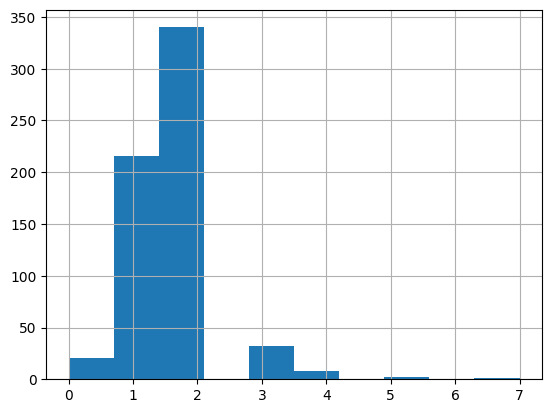

In [622]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].hist()

In [623]:
data["stay_time"]

0       211 days
1       829 days
2       456 days
3        87 days
4       840 days
         ...    
980    Em aberto
981    Em aberto
982    Em aberto
983    Em aberto
984    Em aberto
Name: stay_time, Length: 985, dtype: object

In [624]:
data["stay_time"] = data["stay_time"].str.extract('(\d+) days').astype(float)

In [625]:
data["stay_time"].fillna(0,inplace=True)

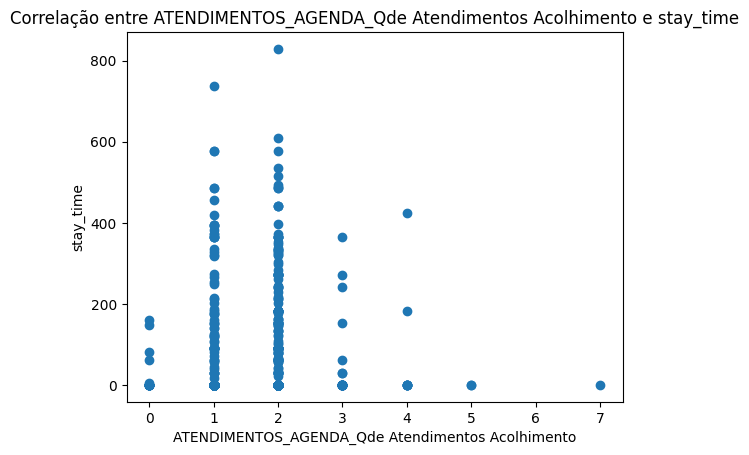

In [626]:
import matplotlib.pyplot as plt


# Calcular a correlação entre todas as colunas e a coluna alvo
plt.scatter(data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"], data["stay_time"])
plt.title(f'Correlação entre {"ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"} e {"stay_time"}')
plt.xlabel("ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento")
plt.ylabel("stay_time")
plt.show()

In [627]:
data_corr = data[["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento","stay_time"]]

data_corr.corr()

,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,stay_time
ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,1.000000,0.011861
stay_time,0.011861,1.000000


In [628]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].fillna(0,inplace=True)

In [629]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
980    0.0
981    1.0
982    0.0
983    2.0
984    0.0
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 985, dtype: float64

In [630]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].fillna(0,inplace=True)

In [631]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
980    0.0
981    0.0
982    0.0
983    0.0
984    0.0
Name: ATENDIMENTOS_AGENDA_Faltas Acolhimento, Length: 985, dtype: float64

In [632]:
data_corr = data[["ATENDIMENTOS_AGENDA_Faltas Acolhimento","stay_time"]]

data_corr.corr()

,ATENDIMENTOS_AGENDA_Faltas Acolhimento,stay_time
ATENDIMENTOS_AGENDA_Faltas Acolhimento,1.00000,-0.15877
stay_time,-0.15877,1.00000


<Axes: >

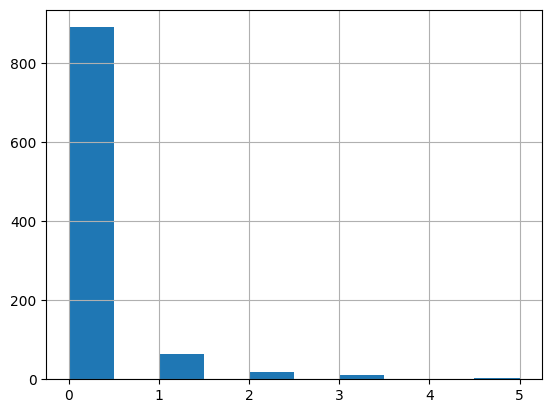

In [633]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].hist()

In [634]:
data["ATENDIMENTOS_AGENDA_Datas Acolhimento"].fillna("Nunca ocorreu",inplace=True)

In [635]:
data = data[~data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].astype(str).str.contains("Nunca ocorreu")]

In [636]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado 'data' com uma coluna 'ATENDIMENTOS_AGENDA_Datas Acolhimento'
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.split(';')

# Se você deseja criar uma nova coluna para cada data:
data = data.explode('ATENDIMENTOS_AGENDA_Datas Acolhimento')
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = pd.to_datetime(data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.strip(), format='%Y-%m-%d %H:%M:%S')




In [637]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento']

0     2022-04-18 15:00:00
0     2023-06-05 10:00:00
1     2022-04-27 17:40:00
1     2022-05-17 19:30:00
12    2022-04-14 20:00:00
              ...        
978   2023-11-07 09:00:00
978   2023-11-17 09:00:00
981   2023-11-07 12:30:00
983   2023-11-14 18:00:00
983   2023-11-22 18:30:00
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento, Length: 1041, dtype: datetime64[ns]

In [638]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].dt.month

In [639]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']

0       4
0       6
1       4
1       5
12      4
       ..
978    11
978    11
981    11
983    11
983    11
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes, Length: 1041, dtype: int32

In [640]:
atendimentos_por_mes = data.groupby(['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']).size().reset_index(name='ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento')


In [641]:
data = pd.merge(data, atendimentos_por_mes, on=['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'], how='left')

<Axes: >

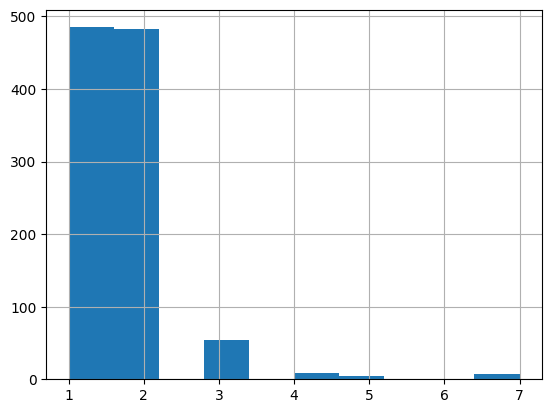

In [642]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y"].hist()

In [643]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,WHOQOL_Ambiental_New,COMUNICARE_Problemas Abertos Bool,TWILIO_Data Última Mensagens Inbound Recente,stay_time,last_stage_concluded,process_time,TWILIO_Data Última Mensagens Outbound Recente,TWILIO_Data Última Ligações Outbound Recente,ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y
0,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.5,0,False,211.0,Questionário,2022-04-19 15:19:40,True,True,4,1
1,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.5,0,False,211.0,Questionário,2022-04-19 15:19:40,True,True,6,1
2,654,64,82,Rio de Janeiro,Rio de Janeiro,20710-060,2021-04-25,2023-08-02,0,5,...,3.1,1,True,829.0,Questionário,2022-04-28 03:00:00,False,False,4,1
3,654,64,82,Rio de Janeiro,Rio de Janeiro,20710-060,2021-04-25,2023-08-02,0,5,...,3.1,1,True,829.0,Questionário,2022-04-28 03:00:00,False,False,5,1
4,1080,63,80,Pernambuco,Recife,50070-045,2021-07-19,2023-08-18,0,5,...,3.5,1,True,737.0,Questionário,2022-04-18 15:07:13,True,True,4,1


## ATENDIMENTOS_AGENDA_Faltas Acolhimento

Descrição : Contagem das faltas considerando apenas os atendimentos com a equipe de acolhimento


Observação : Junto com a coluna "ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento", podemos criar uma nova coluna indicando a taxa de falta de cada cliente, o que pode ajudar a indicar o nível de comprometimento do cliente com os agendamentos.


In [644]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"] = data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"] / data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_x"]

In [645]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].value_counts()

ATENDIMENTOS_AGENDA_Faltas Taxa
0.000000    926
0.500000     44
1.000000     35
2.000000     11
1.500000     10
0.200000      5
3.000000      4
0.333333      3
2.500000      2
5.000000      1
Name: count, dtype: int64

<Axes: >

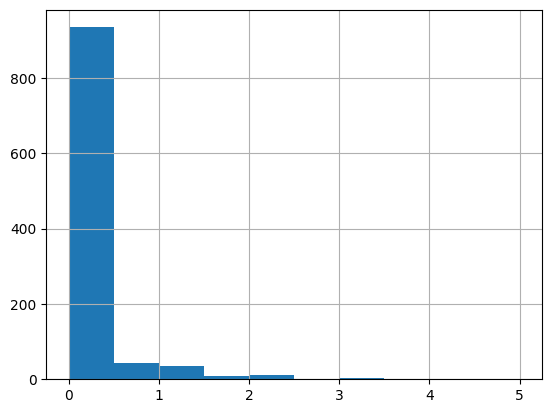

In [646]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].hist()

In [647]:
data["ATENDIMENTOS_AGENDA_Datas Prescrição"]

0       False
1       False
2       False
3       False
4       False
        ...  
1036    False
1037    False
1038    False
1039    False
1040    False
Name: ATENDIMENTOS_AGENDA_Datas Prescrição, Length: 1041, dtype: bool

In [648]:
data = data.sort_values(["PESSOA_PIPEDRIVE_id_person","ATENDIMENTOS_AGENDA_Datas Prescrição"])

In [649]:
data['IntervaloEntrePrescricoes'] = data.groupby('PESSOA_PIPEDRIVE_id_person')['ATENDIMENTOS_AGENDA_Datas Prescrição'].diff()

In [650]:
data["IntervaloEntrePrescricoes"].value_counts()

IntervaloEntrePrescricoes
0    442
Name: count, dtype: int64

## TWILIO_Mensagens Inbound e TWILIO_Mensagens Outbound

Descrição : Contagem de mensagens enviadas pela pessoa
            e
            Contagem de mensagens enviadas pela equipe de saúde


Observação : Através dessas duas colunas, podemos calcular a razão entre as mensagens recebidas e as mensagens enviadas, conseguindo refletir o engajamento e a participação ativa do cliente na plataforma.


In [651]:
data["TWILIO_Mensagens Já Enviou"] = data["TWILIO_Mensagens Inbound"] > 0

In [652]:
data["TWILIO_Mensagens Razão"] = data["TWILIO_Mensagens Outbound"] / data["TWILIO_Mensagens Inbound"].where(data["TWILIO_Mensagens Já Enviou"], 1)

<Axes: >

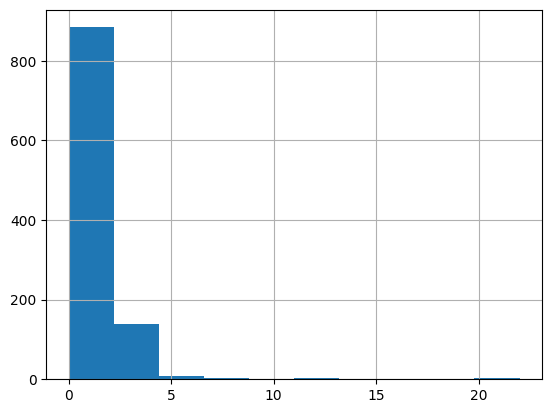

In [653]:
data["TWILIO_Mensagens Razão"].hist()

In [654]:
data["TWILIO_Mensagens Razão"].value_counts()

TWILIO_Mensagens Razão
2.000000    25
1.000000    18
3.000000    17
0.000000    16
1.500000    14
            ..
0.915966     1
0.942623     1
0.928571     1
1.080000     1
0.700000     1
Name: count, Length: 461, dtype: int64

## PESSOA_PIPEDRIVE_age

Descrição : Idade da Pessoa


Observação : Iremos dividir essa coluna em Outras, indicando a faixa etária da pessoa, ou seja, se ela pertence a faixa etária criança, jovem, adulto ou idoso

In [655]:
data["PESSOA_PIPEDRIVE CRIANÇA"] = data["PESSOA_PIPEDRIVE_age"] <= 16

In [656]:
data["PESSOA_PIPEDRIVE CRIANÇA"].value_counts()

PESSOA_PIPEDRIVE CRIANÇA
False    1036
True        5
Name: count, dtype: int64

In [657]:
data["PESSOA_PIPEDRIVE JOVEM"] = (data["PESSOA_PIPEDRIVE_age"] > 16) & (data["PESSOA_PIPEDRIVE_age"] <= 30)

In [658]:
data["PESSOA_PIPEDRIVE JOVEM"].value_counts()

PESSOA_PIPEDRIVE JOVEM
True     583
False    458
Name: count, dtype: int64

In [659]:
data["PESSOA_PIPEDRIVE ADULTO"] = (data["PESSOA_PIPEDRIVE_age"] > 30) & (data["PESSOA_PIPEDRIVE_age"] <= 60)

In [660]:
data["PESSOA_PIPEDRIVE ADULTO"].value_counts()

PESSOA_PIPEDRIVE ADULTO
False    609
True     432
Name: count, dtype: int64

In [661]:
data["PESSOA_PIPEDRIVE IDOSO"] = data["PESSOA_PIPEDRIVE_age"] > 60

In [662]:
data["PESSOA_PIPEDRIVE IDOSO"].value_counts()

PESSOA_PIPEDRIVE IDOSO
False    1020
True       21
Name: count, dtype: int64